**Face mask detection using MobileNet and Global Pooling Block**

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-bc91f969-6748-4caf-e71b-960b27f152bd)


In [ ]:
!pip install tensorflow==2.8.0

# Importing Dependencies

In [3]:
from sklearn.metrics import confusion_matrix, classification_report
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import *
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import random
import cv2
import os


# Loading Data

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

 97% 322M/330M [00:09<00:00, 35.3MB/s]
100% 330M/330M [00:09<00:00, 37.3MB/s]


In [ ]:
! unzip face-mask-12k-images-dataset.zip

# How Data Looks

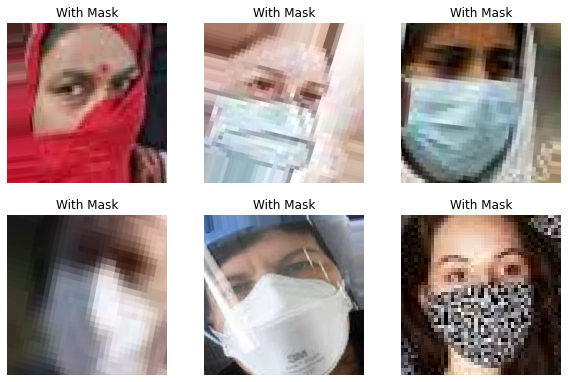

In [ ]:
from os import listdir
listdir()
NCovid_train='/content/Face Mask Dataset/Train/WithMask'
train_images_NC=listdir(NCovid_train)
plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.imshow(plt.imread(os.path.join(NCovid_train,train_images_NC[i])),cmap='gray')
    plt.title('With Mask')
    plt.axis('off')
plt.show()

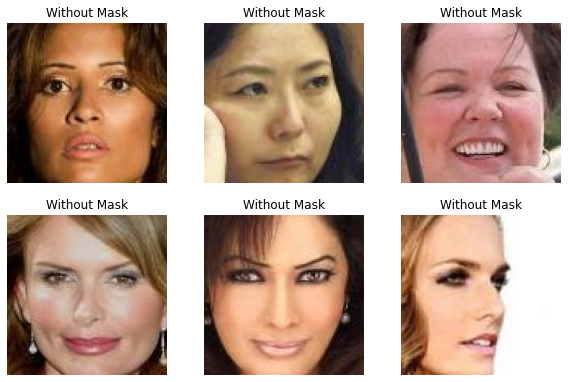

In [ ]:
from os import listdir
listdir()
NCovid_train='/content/Face Mask Dataset/Train/WithoutMask'
train_images_NC=listdir(NCovid_train)
plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.imshow(plt.imread(os.path.join(NCovid_train,train_images_NC[i])),cmap='gray')
    plt.title('Without Mask')
    plt.axis('off')
plt.show()

**Image Counts**

In [ ]:
total_train_with_mask = len(os.listdir('/content/Face Mask Dataset/Train/WithMask'))
total_train_without_mask = len(os.listdir('/content/Face Mask Dataset/Train/WithoutMask'))
total_test_with_mask = len(os.listdir('/content/Face Mask Dataset/Test/WithMask'))
total_test_without_mask = len(os.listdir('/content/Face Mask Dataset/Test/WithoutMask'))
total_val_with_mask = len(os.listdir('/content/Face Mask Dataset/Validation/WithMask'))
total_val_without_mask = len(os.listdir('/content/Face Mask Dataset/Validation/WithoutMask'))

print("Train sets images with mask: {}".format(total_train_with_mask))
print('--------------------------------------------')
print("Train sets images without mask: {}".format(total_train_without_mask))
print('--------------------------------------------')
print("Test sets images with mask: {}".format(total_test_with_mask))
print('--------------------------------------------')
print("Test sets images without mask: {}".format(total_test_without_mask))
print('--------------------------------------------')
print("Val sets images with mask: {}".format(total_val_with_mask))
print('--------------------------------------------')
print("Val sets images without mask: {}".format(total_val_without_mask))

Train sets images with mask: 5000
--------------------------------------------
Train sets images without mask: 5000
--------------------------------------------
Test sets images with mask: 483
--------------------------------------------
Test sets images without mask: 509
--------------------------------------------
Val sets images with mask: 400
--------------------------------------------
Val sets images without mask: 400


# Image Proccessing

In [73]:
train_datagen = ImageDataGenerator( horizontal_flip=True,
                                   shear_range=0.2,
                                  rescale= 1./255,
                                  zoom_range=0.2,)

test_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

train_path='/content/Face Mask Dataset/Train'
test_path = '/content/Face Mask Dataset/Test'
val_path = '/content/Face Mask Dataset/Validation'

train_set = train_datagen.flow_from_directory(
        train_path,
        target_size=(224,224),
        batch_size=32,
        shuffle = False,
        seed = 42,
         class_mode = "categorical",
        classes = ['WithoutMask','WithMask'])

test_set = test_datagen.flow_from_directory(
        test_path,
        target_size=(224,224),
        seed = 42,
        shuffle = False,
        batch_size=32,
        class_mode = "categorical",
        classes = ['WithoutMask','WithMask'])

val_set = val_datagen.flow_from_directory(
        val_path,
        target_size=(224,224),
        seed = 42,
        shuffle = False,
        batch_size=32,
        class_mode = "categorical",
        classes = ['WithoutMask','WithMask'])

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [7]:
train_set.class_indices


{'WithoutMask': 0, 'WithMask': 1}

# After Proccessing

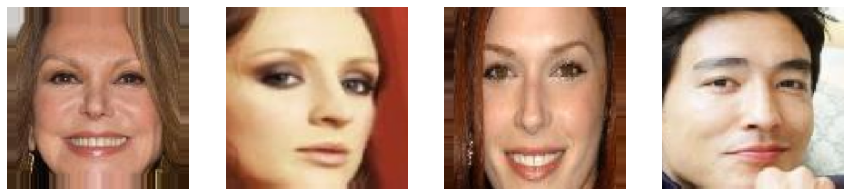

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

for i in range(4):
  image = next(train_set)[0]
  image = np.squeeze(image)
  ax[i].imshow(image)
  ax[i].axis('off')

# Model Building

In [74]:
from keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

# MobileNetV2

In [ ]:
mobilenet = MobileNetV2(input_shape=(224,224,3),weights = "imagenet", include_top = False)

for layer in mobilenet.layers:
    layer.trainable = False
    

model = Sequential()
model.add(mobilenet)
model.add(Flatten())
model.add(Dense(2,activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [76]:
mobilenet_history = model.fit(train_set,epochs=5,validation_data=val_set)

Epoch 1/5
313/313 [==============================] - 123s 385ms/step - loss: 0.5114 - accuracy: 0.9755 - val_loss: 0.0584 - val_accuracy: 0.9875
Epoch 2/5
313/313 [==============================] - 110s 353ms/step - loss: 0.1341 - accuracy: 0.9890 - val_loss: 0.0733 - val_accuracy: 0.9912
Epoch 3/5
313/313 [==============================] - 110s 350ms/step - loss: 0.0410 - accuracy: 0.9961 - val_loss: 0.1685 - val_accuracy: 0.9937
Epoch 4/5
313/313 [==============================] - 109s 349ms/step - loss: 0.1246 - accuracy: 0.9922 - val_loss: 0.4197 - val_accuracy: 0.9862
Epoch 5/5
313/313 [==============================] - 111s 353ms/step - loss: 0.0534 - accuracy: 0.9970 - val_loss: 0.0978 - val_accuracy: 0.9962


**Plot**

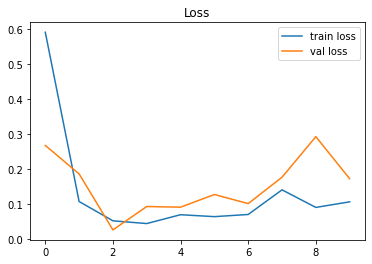

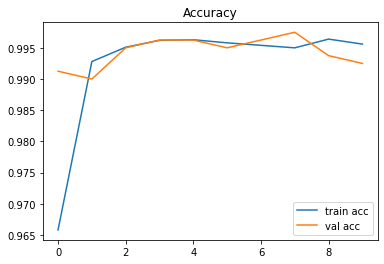

In [ ]:
plt.plot(mobilenet_history.history['loss'], label='train loss')
plt.plot(mobilenet_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

plt.plot(mobilenet_history.history['accuracy'], label='train acc')
plt.plot(mobilenet_history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

**Evaluation**

In [77]:
mobilenet_auc = model.evaluate(test_set)

31/31 [==============================] - 2s 73ms/step - loss: 0.1049 - accuracy: 0.9960


In [78]:
test_pred = model.predict(test_set)
test_pred = np.argmax(test_pred,axis = 1)
test_labels = test_set.labels

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

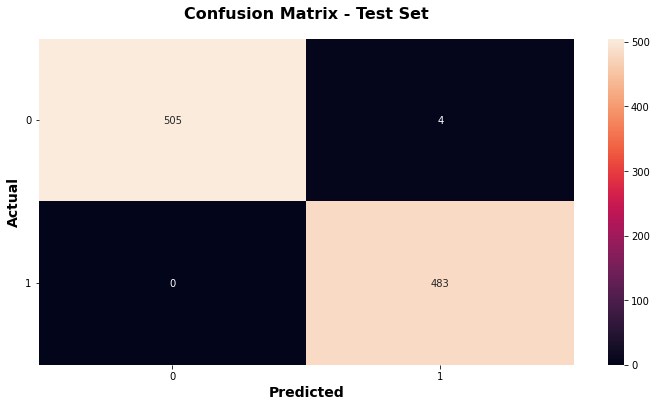

In [79]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
    test_labels,
    test_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
),annot = True,
  fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

In [80]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(test_labels,test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       509
           1       0.99      1.00      1.00       483

    accuracy                           1.00       992
   macro avg       1.00      1.00      1.00       992
weighted avg       1.00      1.00      1.00       992



# MobileNetV2 with GMP

In [ ]:
mobilenetGP = MobileNetV2(input_shape=(224,224,3),weights = "imagenet", include_top = False)

for layer in mobilenet.layers:
    layer.trainable = False
    

model = Sequential()
model.add(mobilenetGP)
model.add(GlobalMaxPool2D())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [82]:
mobilenetGP_history = model.fit(train_set,epochs=10,validation_data=val_set)

Epoch 1/10
313/313 [==============================] - 136s 419ms/step - loss: 0.7505 - accuracy: 0.6582 - val_loss: 0.5274 - val_accuracy: 0.7437
Epoch 2/10
313/313 [==============================] - 130s 415ms/step - loss: 0.0812 - accuracy: 0.9699 - val_loss: 0.8359 - val_accuracy: 0.5225
Epoch 3/10
313/313 [==============================] - 130s 415ms/step - loss: 0.0304 - accuracy: 0.9954 - val_loss: 1.6290 - val_accuracy: 0.6200
Epoch 4/10
313/313 [==============================] - 130s 415ms/step - loss: 0.1056 - accuracy: 0.9670 - val_loss: 7.3874 - val_accuracy: 0.5000
Epoch 5/10
313/313 [==============================] - 130s 416ms/step - loss: 0.0533 - accuracy: 0.9818 - val_loss: 6.2087 - val_accuracy: 0.4963
Epoch 6/10
313/313 [==============================] - 131s 417ms/step - loss: 0.0273 - accuracy: 0.9953 - val_loss: 2.6666 - val_accuracy: 0.5663
Epoch 7/10
313/313 [==============================] - 131s 417ms/step - loss: 0.0221 - accuracy: 0.9976 - val_loss: 2.5896 -

**Plot**

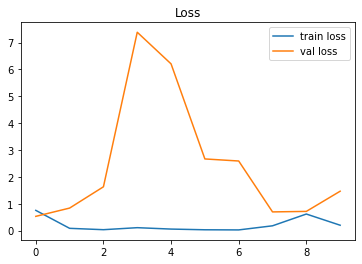

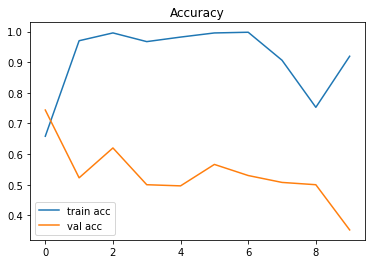

In [83]:
plt.plot(mobilenetGP_history.history['loss'], label='train loss')
plt.plot(mobilenetGP_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

plt.plot(mobilenetGP_history.history['accuracy'], label='train acc')
plt.plot(mobilenetGP_history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

**Evaluation**

In [84]:
mobilenetGP_auc = model.evaluate(test_set)

31/31 [==============================] - 2s 75ms/step - loss: 1.4350 - accuracy: 0.3357


In [85]:
test_pred = model.predict(test_set)
test_pred = np.argmax(test_pred,axis = 1)
test_labels = test_set.labels

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

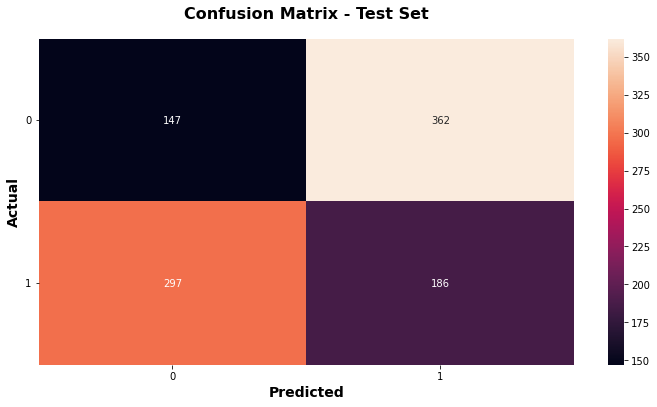

In [86]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
    test_labels,
    test_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
),annot = True,
  fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

In [87]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(test_labels,test_pred))

              precision    recall  f1-score   support

           0       0.33      0.29      0.31       509
           1       0.34      0.39      0.36       483

    accuracy                           0.34       992
   macro avg       0.34      0.34      0.33       992
weighted avg       0.34      0.34      0.33       992



# ResNet50

In [10]:
from tensorflow.keras.applications.resnet import ResNet50 

resnet = ResNet50(include_top=False, 
                  weights='imagenet', 
                  input_shape=(224,224,3))

for layer in resnet.layers:
    layer.trainable = False


model = Sequential()
model.add(resnet)
model.add(Flatten())
model.add(Dense(2,activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

94781440/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


In [13]:
resnet_history = model.fit(train_set,epochs=5,validation_data=val_set)

Epoch 1/5
313/313 [==============================] - 119s 378ms/step - loss: 0.9008 - accuracy: 0.8801 - val_loss: 0.5615 - val_accuracy: 0.8462
Epoch 2/5
313/313 [==============================] - 118s 377ms/step - loss: 1.2753 - accuracy: 0.8422 - val_loss: 0.5687 - val_accuracy: 0.8575
Epoch 3/5
313/313 [==============================] - 118s 376ms/step - loss: 0.4613 - accuracy: 0.9032 - val_loss: 0.3332 - val_accuracy: 0.9050
Epoch 4/5
313/313 [==============================] - 116s 371ms/step - loss: 0.6117 - accuracy: 0.8918 - val_loss: 0.2168 - val_accuracy: 0.9225
Epoch 5/5
313/313 [==============================] - 117s 373ms/step - loss: 0.8531 - accuracy: 0.8587 - val_loss: 0.4380 - val_accuracy: 0.9125


**Plot**

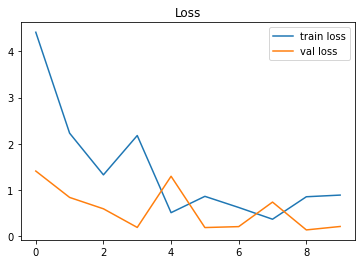

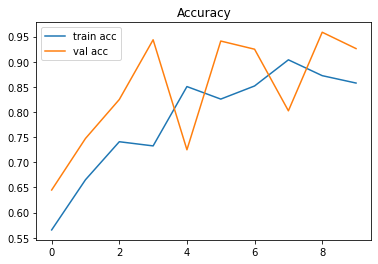

In [12]:
plt.plot(resnet_history.history['loss'], label='train loss')
plt.plot(resnet_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

plt.plot(resnet_history.history['accuracy'], label='train acc')
plt.plot(resnet_history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

**Evaluation**

In [14]:
resnet_auc = model.evaluate(test_set)

31/31 [==============================] - 4s 128ms/step - loss: 0.3260 - accuracy: 0.9214


In [15]:
test_pred = model.predict(test_set)
test_pred = np.argmax(test_pred,axis = 1)
test_labels = test_set.labels

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

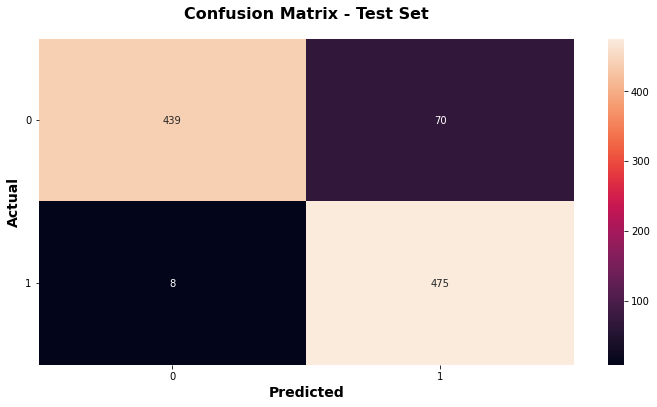

In [19]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
    test_labels,
    test_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None,
),annot = True,
  fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(test_labels,test_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       509
           1       0.87      0.98      0.92       483

    accuracy                           0.92       992
   macro avg       0.93      0.92      0.92       992
weighted avg       0.93      0.92      0.92       992



# **InceptionV3 / GoogleNet**

In [21]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

inception = InceptionV3(include_top=False, 
                  weights='imagenet', 
                  input_shape=(224,224,3))

for layer in inception.layers:
    layer.trainable = False


model = Sequential()
model.add(inception)
model.add(Flatten())
model.add(Dense(2,activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

87924736/87910968 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_1 (Dense)             (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


In [24]:
inception_history = model.fit(train_set,epochs=2,validation_data=val_set)

Epoch 1/2
313/313 [==============================] - 124s 396ms/step - loss: 0.0904 - accuracy: 0.9962 - val_loss: 0.0040 - val_accuracy: 0.9987
Epoch 2/2
313/313 [==============================] - 117s 373ms/step - loss: 0.0376 - accuracy: 0.9977 - val_loss: 0.0200 - val_accuracy: 0.9987


**Plot**

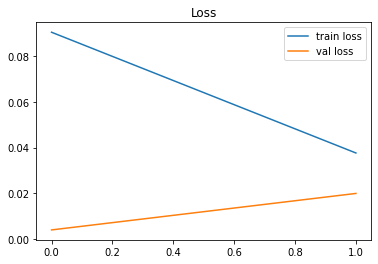

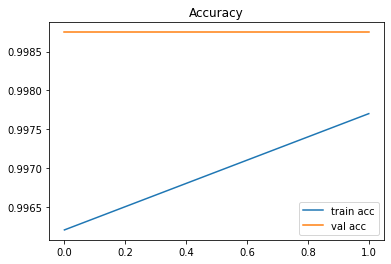

In [25]:
plt.plot(inception_history.history['loss'], label='train loss')
plt.plot(inception_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

plt.plot(inception_history.history['accuracy'], label='train acc')
plt.plot(inception_history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

**Evaluation**

In [26]:
inception_auc = model.evaluate(test_set)

31/31 [==============================] - 3s 91ms/step - loss: 0.1075 - accuracy: 0.9960


In [27]:
test_pred = model.predict(test_set)
test_pred = np.argmax(test_pred,axis = 1)
test_labels = test_set.labels

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

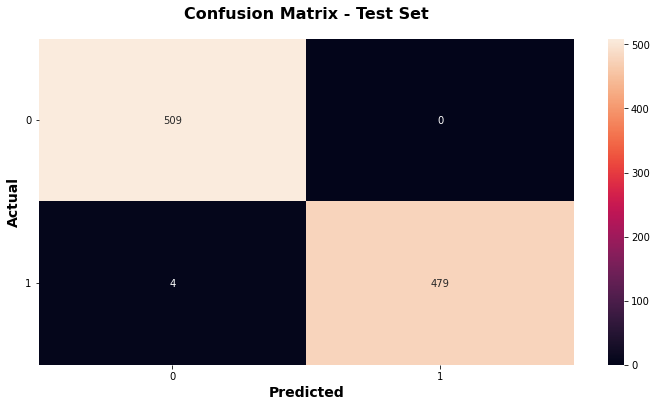

In [28]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
    test_labels,
    test_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None,
),annot = True,
  fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(test_labels,test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       509
           1       1.00      0.99      1.00       483

    accuracy                           1.00       992
   macro avg       1.00      1.00      1.00       992
weighted avg       1.00      1.00      1.00       992



# Custom CNN

In [30]:
from keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [ ]:
model = Sequential()

model.add(layers.Conv2D(64,(3,3),activation='relu',strides=2 ,input_shape=(224,224,3)))
model.add(layers.Conv2D(128,(3,3),activation='relu',strides=2))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32,(3,3),activation='relu',strides=1))
model.add(layers.Conv2D(64,(3,3),activation='relu',strides=1))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2,'softmax'))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [34]:
cnn_history = model.fit(train_set,epochs=5,validation_data=val_set)

Epoch 1/5
313/313 [==============================] - 119s 374ms/step - loss: 0.5629 - accuracy: 0.6792 - val_loss: 0.2982 - val_accuracy: 0.8737
Epoch 2/5
313/313 [==============================] - 111s 354ms/step - loss: 0.2534 - accuracy: 0.9064 - val_loss: 0.2630 - val_accuracy: 0.9262
Epoch 3/5
313/313 [==============================] - 131s 419ms/step - loss: 0.1559 - accuracy: 0.9466 - val_loss: 0.0859 - val_accuracy: 0.9712
Epoch 4/5
313/313 [==============================] - 110s 350ms/step - loss: 0.1151 - accuracy: 0.9603 - val_loss: 0.0666 - val_accuracy: 0.9800
Epoch 5/5
313/313 [==============================] - 120s 382ms/step - loss: 0.0976 - accuracy: 0.9640 - val_loss: 0.0523 - val_accuracy: 0.9850


**Plot**

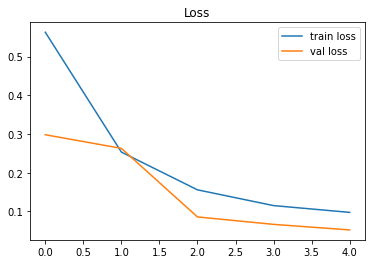

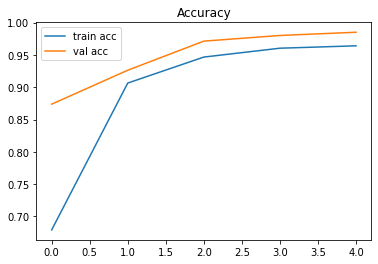

In [36]:
plt.plot(cnn_history.history['loss'], label='train loss')
plt.plot(cnn_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

plt.plot(cnn_history.history['accuracy'], label='train acc')
plt.plot(cnn_history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

**Evaluation**

In [37]:
cnn_auc = model.evaluate(test_set)

31/31 [==============================] - 3s 87ms/step - loss: 0.1377 - accuracy: 0.9607


In [38]:
test_pred = model.predict(test_set)
test_pred = np.argmax(test_pred,axis = 1)
test_labels = test_set.labels

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

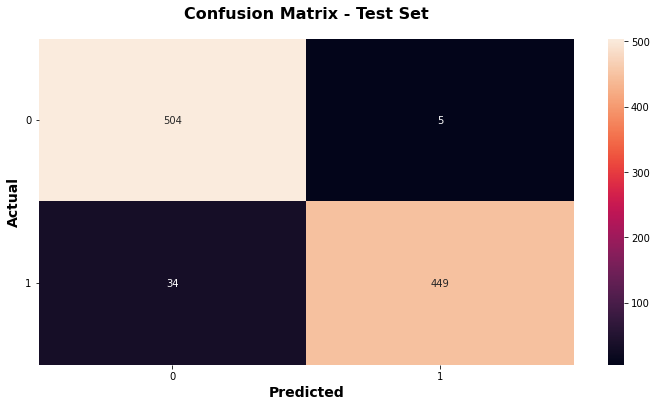

In [39]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
    test_labels,
    test_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None,
),annot = True,
  fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(test_labels,test_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       509
           1       0.99      0.93      0.96       483

    accuracy                           0.96       992
   macro avg       0.96      0.96      0.96       992
weighted avg       0.96      0.96      0.96       992



# Prediction with CNN

In [56]:
def predict(path):

    img = cv2.imread(path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224),interpolation=cv2.INTER_NEAREST)
    plt.axis('off')
    plt.imshow(img)
    img = np.expand_dims(img,axis=0)
    predict = model.predict(img)
    predict = np.argmax(predict,axis = 1)

    if predict == 1:
      print('With Mask')
    else:
      print('No Mask')



With Mask


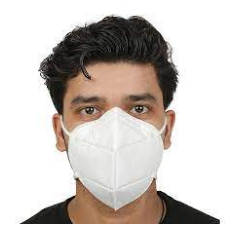

In [68]:
predict('/content/index.jpg')

# Comparing All models

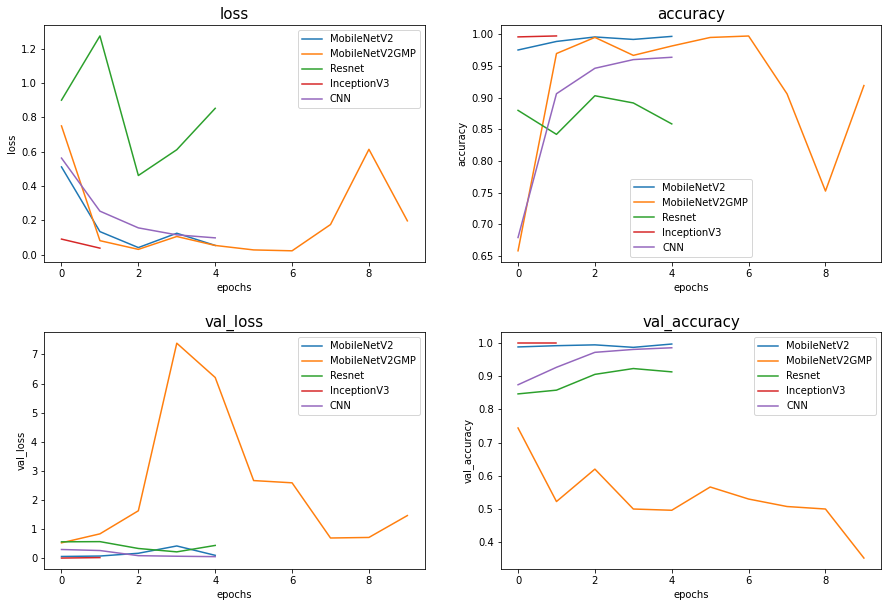

In [88]:
model_hist = [mobilenet_history,mobilenetGP_history,resnet_history,inception_history,cnn_history]
names = ['MobileNetV2', 'MobileNetV2GMP','Resnet','InceptionV3','CNN']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.3)
for metric in model_hist[0].history:
    index = list(model_hist[0].history).index(metric)
    ax = axes.flatten()[index]
    name_index = 0
    for history in model_hist:
        ax.plot(history.history[metric], label=names[name_index])
        name_index += 1
    ax.set_title(metric, size=15)
    ax.set_xlabel('epochs')
    ax.set_ylabel(metric)
    ax.legend()
plt.show()

In [89]:
data={'Nets':['MobileNetV2', 'MobileNetV2GMP','Resnet','InceptionV3','CNN'],
      'Accuracy':[mobilenet_auc[1],mobilenetGP_auc[1],resnet_auc[1],inception_auc[1],cnn_auc[1]]}

df =pd.DataFrame(data)

df.sort_values('Accuracy', ascending=False)

,Nets,Accuracy
0,MobileNetV2,0.995968
3,InceptionV3,0.995968
4,CNN,0.960685
2,Resnet,0.921371
1,MobileNetV2GMP,0.335685
